# Mini Projet : Mouvement rétrograde de Mars #

## Rappels : ##



Pour un mouvement circulaire de rayon R, de période T, et de phase à l'origine Phi : 

X(t) = R*cos(O(t))

X(t) = R*sin(O(t)) 

O(t) = Phi + 2 * Pi * t/T


X(t) = R*cos(Phi + 2 * Pi * t/T)

X(t) = R*sin(Phi + 2 * Pi * t/T) 

## Modèle ##



On représente le mouvement de Mars et de la Terre comme circulaire uniforme et contenu dans la plan de l'écliptique.

Soit D_X(t) et D_Y(t) les coordonnées en X et en Y du vecteur Terre-Mars.
Phi_app correspond à la longitude de Mars vue depuis la Terre.

On a tan(Phi_app) = D_Y(t)/D_X(t)

donc  : Phi_app = arctan(D_Y(t)/D_X(t))


On peut obtenir D_X et D_Y à partir des coordonnées des vecteurs positions de Mars et de la Terre.

![solar.png](solar.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
phi_Terre = np.deg2rad(240.5)
phi_Mars = np.deg2rad(240.5)

R_Terre = 1       # UA
T_Terre = 365.256 # jours
R_Mars = 1.52371  # UA
T_Mars  = 686.885 # jours

### Lecture des données et génération des tablaux de temps ###

In [10]:
Pos_Mars = pd.read_csv("DataMars.csv", comment = '#')
Pos_Mars["Date"] = pd.to_datetime(Pos_Mars["Date"])
t0 = pd.to_datetime("2016-05-26")                     # date du milieu du mouvement rétrograde
t = (Pos_Mars["Date"]-t0).dt.days                     # tableau des temps en jours centrés sur t0 pour les calculs

### Calcul de la longitude ###

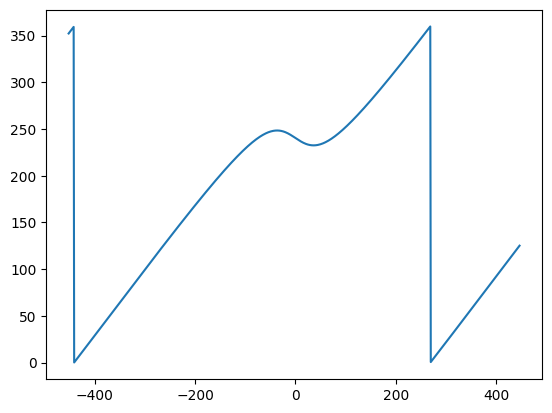

In [7]:
O_Terre = (2*np.pi*t)/T_Terre + phi_Terre
X_Terre = R_Terre*np.cos(O_Terre)
Y_Terre = R_Terre*np.sin(O_Terre)

O_Mars = (2*np.pi*t)/T_Mars + phi_Mars
X_Mars = R_Mars*np.cos(O_Mars)
Y_Mars = R_Mars*np.sin(O_Mars)

Dist_X = X_Terre - X_Mars  
Dist_Y = Y_Terre - Y_Mars

long_Mars = np.rad2deg(np.arctan2(Dist_Y, Dist_X)) +180  # np.arctan2() renvoit des valeurs de pi à -pi, rajoute pi pour obtenir des valeurs comprise entre 0 et 2*pi qui est l'intervalle des données mesurées


plt.plot(t,long_Mars)

### Affichage du modèle et des données sur 300 jours ###

Text(0, 0.5, 'Longitude (°)')

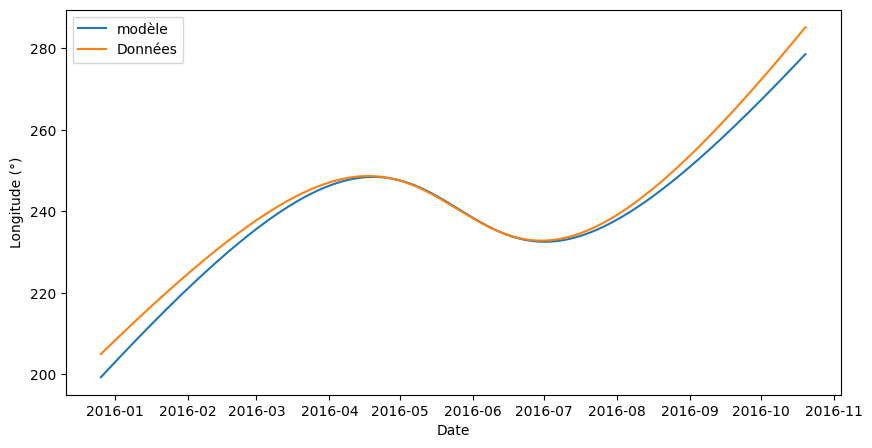

In [4]:
plt.figure(figsize=(10,5))

plt.plot(Pos_Mars["Date"][300:600], long_Mars[300:600], label = "modèle")
plt.plot(Pos_Mars["Date"][300:600], Pos_Mars["Longitude (decimal)"][300:600],label = "Données")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Longitude (°)")

## Conclusion ##

Le graphe du modèle ne se superpose pas au au graphe des mesures. Notre modèle est donc imparfait. Notre simplification des orbites de Mars et de la Terre en orbite circulaire peut être une source de différence entre le modèle et les mesures.